# Debug and Evaluate NN's performance

Here we'll go deeper in examination of our model as much as we can. We are going to continue with the urls because they are unfamiliar, new and vary greatly. So no more interaction with our dataset.

This is an extra multi-class classifiation task so we'll use the most popular method from statistics - working with samples. Here we'll evaluate something like a quarter of the whole dataset or $\approx$ 25-30 breeds. 

We are going to sample 'neighbors' since most of the similar labels stand next to each other. For example look at breeds labeled 98 and 99 - malamute and siberian husky. They are pretty much alike and confusing. The same with Shih Tsu and Pekinese standing on 3 and 4. This has been the story of our dataset. 

If we get a general metric like accuracy of something like 85-91% or even a bit less, since that was our result on data/validation, on completely new data, then the 'randomness' and representativity has been successful.

I built a simple web application that will serve as a better way to get, put and test data and even gather more for future continuation with the currect model. Feel free to go and check it yourself, the link is on the bottom of this notebook.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow.keras.applications import inception_resnet_v2


import pickle
from skimage.transform import resize
from skimage.io import imread

Let's load our work.

In [2]:
model = tf.keras.models.load_model('saved_model-20210201T203511Z-001/saved_model/resnet_inception')

In [3]:
opener = open('dict_of_labels.pickle', 'rb')
named_labels = pickle.load(opener)
opener.close()

Here the idea is simple. We are just going to slightly modify our function 'give top three prediction' from part 3. We'll get the first suggestion of our model and analyze it this way.

In [4]:
def give_index(pic, model, named_labels=named_labels):
  picture = resize(pic, (299, 299), preserve_range = True)
  picture = tf.keras.applications.inception_resnet_v2.preprocess_input(picture)
  picture = tf.expand_dims(picture, axis = 0)
  predictions = model.predict(picture)
  prediction = max(predictions[0])
  index1 = list(predictions[0]).index(prediction)
  return index1

Now I prepared from google search a few links for each label. Some of them are easy, some of them have other objects, some of them with 2 or 3 of the same species in the picture, some picture might not even be read due to some error/forbidden. We'll put them in two mirror arrays and work with them later for stuff like accuracy, confusion matrices, easy and difficult classes and features from our neural network.

In [5]:
test = pd.read_table('test.txt', sep=';', header=None)

In [6]:
test.columns = ['url', 'label']

In [7]:
# The results we'll examine as explained

predicted = []
actual = []

In [8]:
num = 0
for t in test['url']:
    try:
        pred = give_index(imread(t), model, named_labels)
        act = test['label'][num]
        print(f"Predicted: {pred} vs Actual: {act}")
        predicted.append(pred)
        actual.append(act)
    except:
        print('broken image')
    num += 1

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Predicted: 100 vs Actual: 100
Predicted: 100 vs Actual: 100
Predicted: 100 vs Actual: 100
broken image
Predicted: 100 vs Actual: 100
Predicted: 100 vs Actual: 100
Predicted: 9 vs Actual: 9
Predicted: 9 vs Actual: 9
Predicted: 9 vs Actual: 9
Predicted: 9 vs Actual: 9
broken image
Predicted: 9 vs Actual: 9
Predicted: 119 vs Actual: 119
Predicted: 119 vs Actual: 119
Predicted: 1

In [9]:
from tensorflow.keras.metrics import Accuracy

In [10]:
acc = Accuracy()

In [11]:
acc(predicted, actual).numpy() * 100

86.13861203193665

So this accuracy is pretty much the same with what we achieved in the previous notebook. They are not that many example so I printed them and something interesting popped up. It confused label 106(Eskimo Dog) with Samoyed. Google them if you want, they look absolutely the same to me too. The rest of the predictions are pretty standard with very few exceptions so let's focus on this interesting case.

Let's feed our model with more of this two breeds. Will it classify all as Samoyed. Or it is really exracting good features. This will be a great opportunity to look inside the convolutions as well.

In [12]:
# Let's load few samoyeds. Remember, samoyed is 106, eskimo is 97.

samoyed1 = imread('https://d17fnq9dkz9hgj.cloudfront.net/breed-uploads/2018/08/samoyed-card-small.jpg?bust=1535568014')
# samoyed2 = imread('https://www.purina.com.au/-/media/project/purina/main/breeds/puppies/puppy-samoyed.jpg')
samoyed3 = imread('https://images.ctfassets.net/440y9b545yd9/49v1AZmZdiPYkJ4A3vrayj/d7d7db21fed2ef30f5b8e3899633d292/Samoyed850.jpg')

In [13]:
print(give_index(samoyed1, model, named_labels))
# print(give_index(samoyed2, model, named_labels))
print(give_index(samoyed3, model, named_labels))


106
106


Hmm, it keeps insisting with the samoyed. The bell is starting to ring. Let's load more eskimos and see if it will be able to classify them correctly. 

In [14]:
eskimo1 = imread('https://dgicdplf3pvka.cloudfront.net/images/dogbreeds/large/American-Eskimo-Dog.jpg')
eskimo2 = imread('https://www.dogzone.com/images/breeds/american-eskimo-dog-800.jpg')
eskimo3 = imread('https://fwkc-cloudinary.corebine.com/fwkc-production/image/upload/v1/fwkc-prod/EskimoDog')

In [15]:
print(give_index(eskimo1, model, named_labels))
print(give_index(eskimo2, model, named_labels))
print(give_index(eskimo3, model, named_labels))

106
106
106


Are we going to completely ignore the eskimo label? Let's try one last time.

In [16]:
eskimo4 = imread('http://knowledgebase.lookseek.com/images/animals/dogs/American-Eskimo-Dog.jpg')
eskimo5 = imread('https://www.timeforpaws.co.uk/img/American-Eskimo.jpg')
eskimo6 = imread('https://i.pinimg.com/originals/aa/61/d2/aa61d2e6c36d7446c66133ad03ad2cb2.jpg')

In [17]:
print(give_index(eskimo4, model, named_labels))
print(give_index(eskimo5, model, named_labels))
print(give_index(eskimo6, model, named_labels))

107
106
106


Aparently we were lucky enough to probably find the biggest confusion in our model. It completely ignores class 97 and goes for mostly 106 but even confuses it with 107(Pomeranian) which is a different color. It's true that I'm not a dog expert but out of more than 10 pictures from google, most of them at the very beginning of the search results, at least one should be actually Eskimo so we have a problem, it's not a mistake.

We can actually use our Top K Accuracy that we evaluated as very good from the previous notebook.


In [18]:
def give_top_three_candidates(pic, model, named_labels=named_labels):
  picture = resize(pic, (299, 299), preserve_range = True)
  picture = tf.keras.applications.inception_resnet_v2.preprocess_input(picture)
  picture = tf.expand_dims(picture, axis = 0)
  predictions = model.predict(picture)
  score = ''
  prediction = max(predictions[0])
  index1 = list(predictions[0]).index(prediction)
  predictions[0][index1] = 0
  score += f'This is a {named_labels[index1]} with {round((100 * prediction), 2)} % certainty'
  score += '\n'
  prediction = max(predictions[0])
  index2 = list(predictions[0]).index(prediction)
  score += f'Second guess is {named_labels[index2]} with {round((100 * prediction), 2)} % certainty'
  score += "\n"
  predictions[0][index2] = 0
  prediction = max(predictions[0])
  index3 = list(predictions[0]).index(prediction)
  score += f'Third guess is {named_labels[index3]} with {round((100 * prediction), 2)} % certainty'
  return score

In [19]:
print(give_top_three_candidates(eskimo1, model, named_labels))
print('----------------------------------')
print(give_top_three_candidates(eskimo2, model, named_labels))
print('----------------------------------')
print(give_top_three_candidates(eskimo3, model, named_labels))
print('----------------------------------')
print(give_top_three_candidates(eskimo4, model, named_labels))
print('----------------------------------')
print(give_top_three_candidates(eskimo6, model, named_labels))
print('----------------------------------')

This is a Samoyed with 97.07 % certainty
Second guess is Great_Pyrenees with 0.96 % certainty
Third guess is kuvasz with 0.28 % certainty
----------------------------------
This is a Samoyed with 97.13 % certainty
Second guess is Pomeranian with 0.32 % certainty
Third guess is Great_Pyrenees with 0.29 % certainty
----------------------------------
This is a Samoyed with 92.52 % certainty
Second guess is Pomeranian with 4.46 % certainty
Third guess is keeshond with 1.31 % certainty
----------------------------------
This is a Pomeranian with 62.88 % certainty
Second guess is Samoyed with 30.21 % certainty
Third guess is keeshond with 3.14 % certainty
----------------------------------
This is a Samoyed with 52.47 % certainty
Second guess is golden_retriever with 7.88 % certainty
Third guess is Great_Pyrenees with 6.05 % certainty
----------------------------------


We found a very big problem with this class, Eskimo Dog(the one that it should be) hasn't even appeared once in its top 3 suggestions. Let's actually check some of the convolutional layers.

## Visualize  activations

We are going to inside the Inception model to see what's going on with the Convolutions of this Eskimo dog. Let's have a look at the first layers.

In [149]:
from tensorflow.keras.models import Sequential
activation_layers = model.layers[1].layers[:5]
activation_model_beginning = Sequential([
    activation_layers[0],
    activation_layers[1],
    activation_layers[2],
    activation_layers[3],
    activation_layers[4],

])

In [150]:
activation_model_beginning.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_406 (Conv2D)          (None, 149, 149, 32)      864       
_________________________________________________________________
batch_normalization_406 (Bat (None, 149, 149, 32)      96        
_________________________________________________________________
activation_406 (Activation)  (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_407 (Conv2D)          (None, 147, 147, 32)      9216      
Total params: 10,176
Trainable params: 10,112
Non-trainable params: 64
_________________________________________________________________


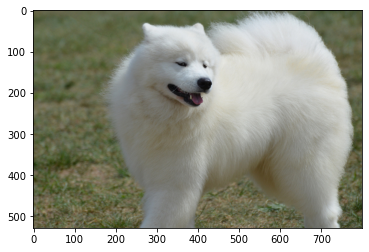

In [156]:
eskimo2 = imread('https://www.dogzone.com/images/breeds/american-eskimo-dog-800.jpg')
plt.imshow(eskimo2)
plt.show()

In [165]:
def preprocess_single_picture(picture_to_examine):
    picture_to_examine = resize(picture_to_examine, (299, 299), preserve_range = True)
    picture_to_examine = tf.keras.applications.inception_resnet_v2.preprocess_input(picture_to_examine)
    picture_to_examine = tf.expand_dims(picture_to_examine, axis = 0)
    return picture_to_examine

In [166]:
eskimo_pic = preprocess_single_picture(eskimo2)
activations = activation_model_beginning.predict(picture_to_examine)

In [167]:
first_layer = activations
first_layer.shape

(1, 147, 147, 32)

As expected our 299 by 299 picture now has a shape 147 to 147 so it's fine for now.

Let's take a look at the different channels.

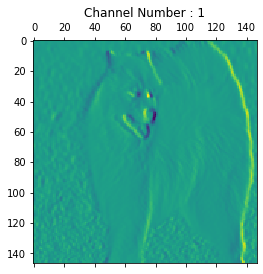

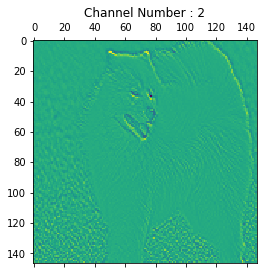

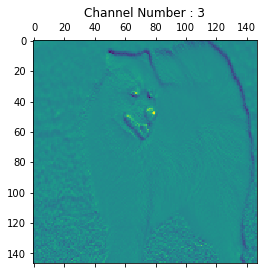

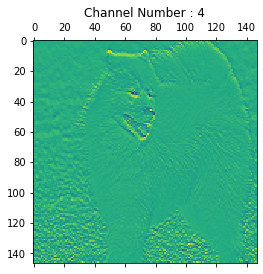

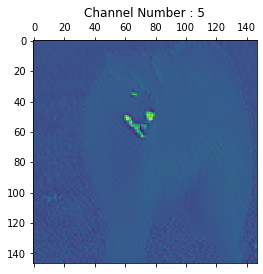

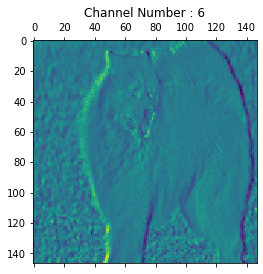

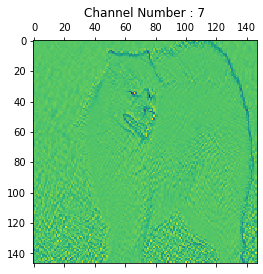

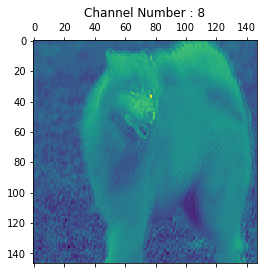

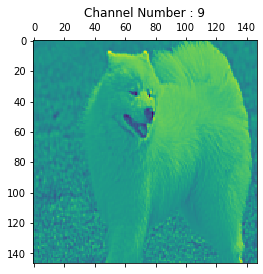

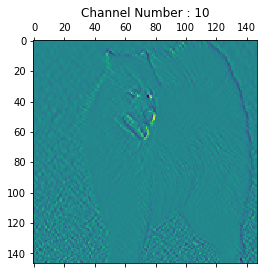

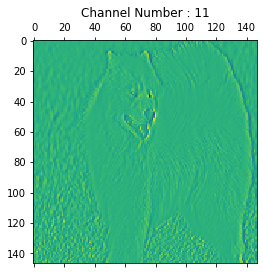

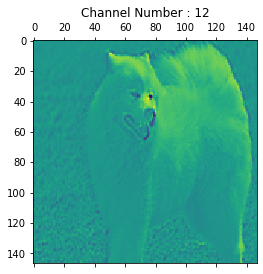

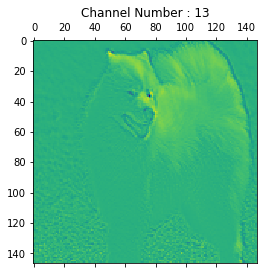

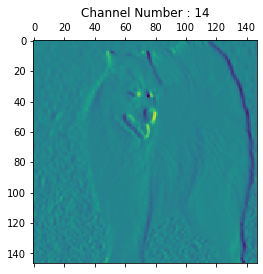

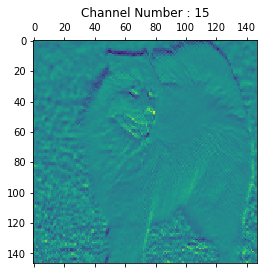

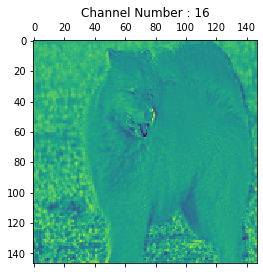

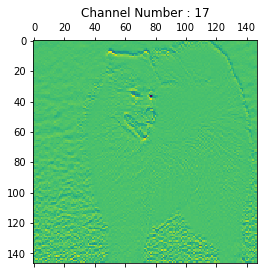

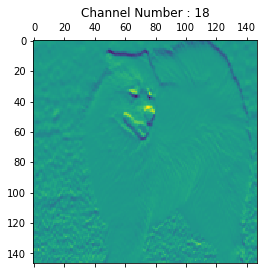

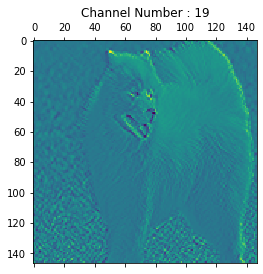

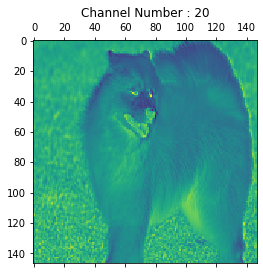

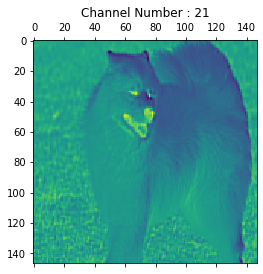

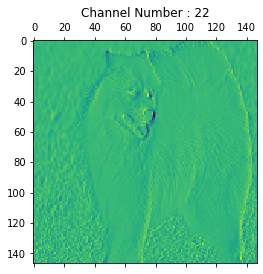

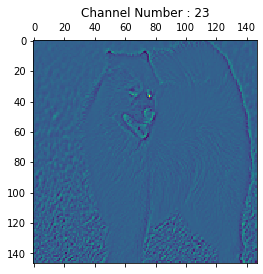

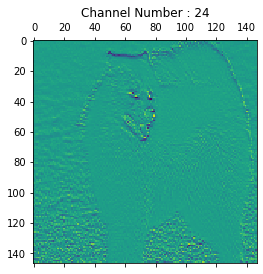

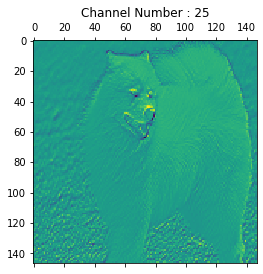

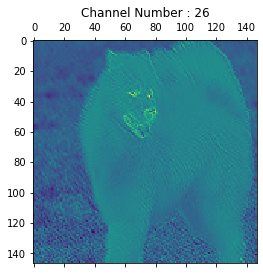

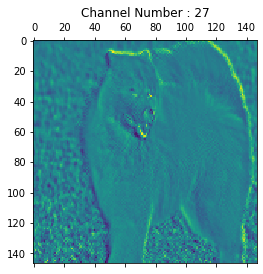

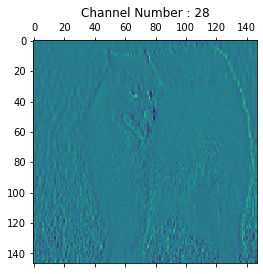

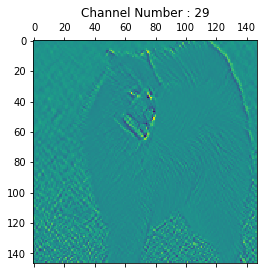

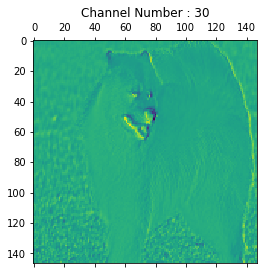

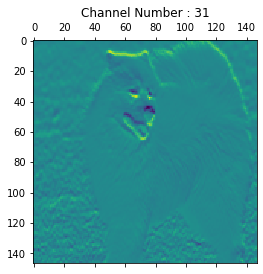

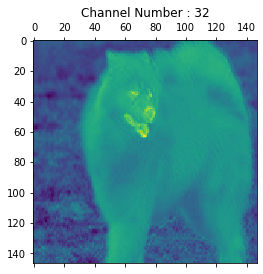

In [168]:
for x in range(32):
    
    plt.matshow(first_layer[0, :, :, x], cmap='viridis')
    plt.title(f'Channel Number : {x+1}')
    plt.show()

It looks fine, not that it is a surprise. For example number 5 appears to encode the facial features of the dog, number 10 is an edge detector etc. There was't big of a hope to have an error in this base model, he is widely used and proven. It's either the model or the dataset. Most likely the latter, because on training, validating and testing we had good Top K Categorical accuracy scores. There should be something wrong with this particular label. Another thing to popped in my mind now is that I created this 'dict_of_labels' pickle object with python script. Something could have gone wrong there as well.

## Conclusion

As you can see we started easily and chilled but as we advanced different problems popped up. Anyway we can't start investigating the concrete and deeper problems without solving the easy ones.

We verified the general performance of our neural network. The accuracy of around 90% for the 120 breeds from Stanford Dogs dataset in general is a fair assessment. We achieved those numbers in training(87%), validation(91.5%) and testing(86.5%). Here we hit probably the biggest confusion wall of all in Samoyed-Eskimo Dog case so the accuracy actually must be higher than that given that and the fact that we didn't select some of the easiest breeds and the urls that we managed to read were around only 100.

There should also be other difficulties with the dataset between hardly distinguishable breeds. In order to verify that and to improve our model I created a simple web application. 

Go to - [this link](http://dogsbreed.ml/) - to check it. 

For now this is it. As you can see doing manually this process is very tedious. It took awhile to make this for 20 breeds, we have another 100.. and these 120 breeds are not even 50% of the existing in the world. The dataset was also far from perfect from what we saw.

## For the future 

*Non-negotiable! - 1.thorough investigations on precision, recall, confusion matrices, problematic labels etc. 2.Dataset investigation as well, might not be alright! 3. Check dict_of_names pickle object, it's a manual work so should be examined.*  

1) Use the Web App to gather more data easily

2) Use it to evaluate and locate other problematic breeds

3) Train the model again focusing on the problematic breeds and its features

4) Add new breeds


## Sources:

For this notebook we followed the guide provided by Francois Chollet in his 'Deep Learning with Python' book. Page 160 - 166.